In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
from sklearn import tree

In [4]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [6]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
#origin model year and cylinders is a discret variables

In [7]:
df=pd.read_csv(url, header=None, delim_whitespace=True)
df.columns=names
df.fillna(df.mean(skipna=True))
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [8]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [9]:
#horsepower still an object let's figure it out

In [10]:
df['horsepower'].replace(to_replace='?',value='0', inplace=True)
df[['horsepower']]=df[['horsepower']].astype('float')
df['horsepower'].fillna(df['horsepower'].mean())

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

In [11]:
df.dtypes
#everything seems good now

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [12]:
df.isnull().sum()
#all the NaN values are filled in 

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [13]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,102.894472,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,40.269544,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [14]:
sm.stats.DescrStatsW(df["mpg"]).zconfint_mean()
#95% confidence level 

(22.74669838467897, 24.282447343964243)

In [15]:
df['car name'].describe()

count            398
unique           305
top       ford pinto
freq               6
Name: car name, dtype: object

In [16]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.754276,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.821656,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.871927,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.754276,0.821656,0.871927,1.000000,0.837987,-0.673940,-0.411587,-0.418636
weight,-0.831741,0.896017,0.932824,0.837987,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.673940,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.411587,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.418636,-0.581024,0.205873,0.180662,1.000000


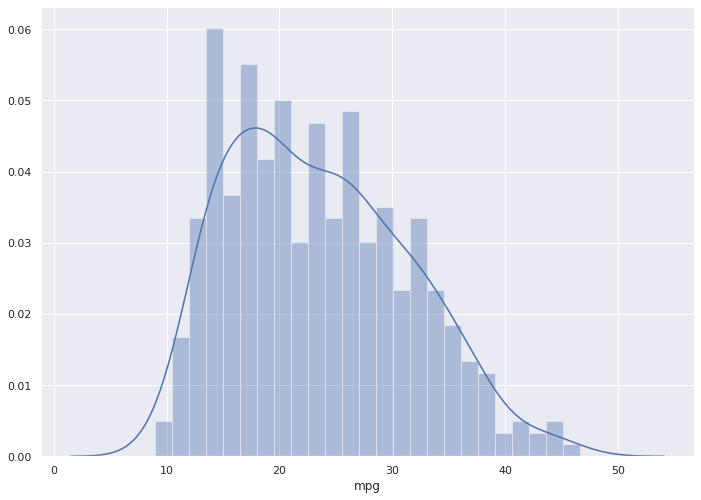

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df["mpg"], bins = 25)
plt.show()

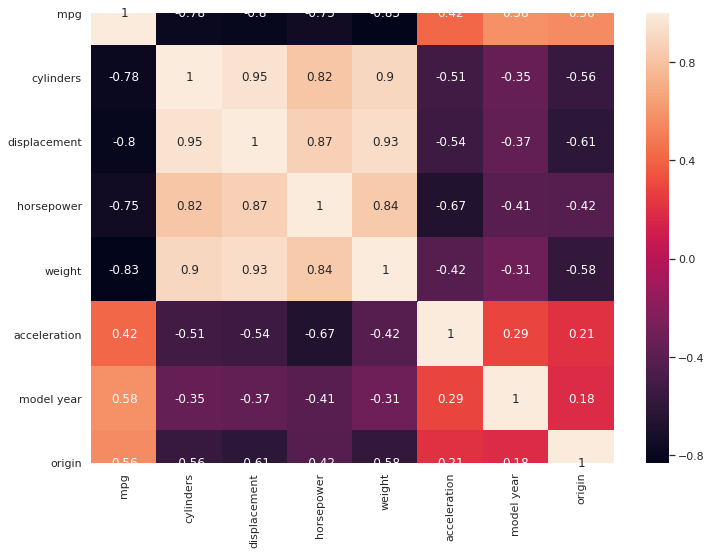

In [18]:
#let plot a heat map of correlation
correlation_matrix = df.corr().round(2)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [19]:
#our target value is 'mpg', according to the heatmap we can see the dependents variables weight horsepower displacement

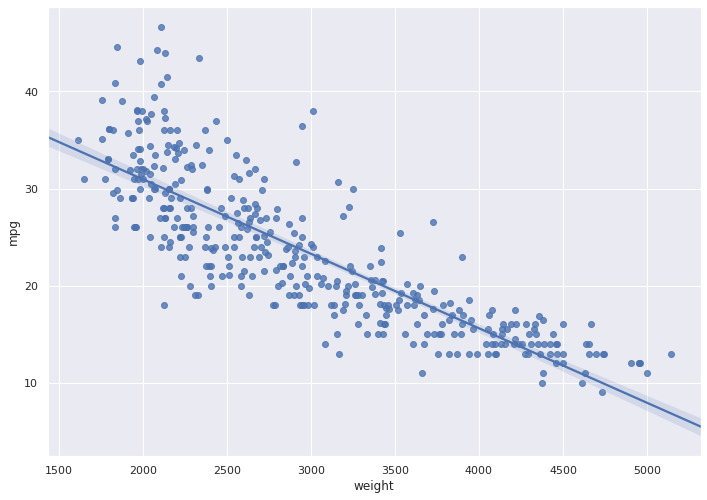

In [20]:
sns.regplot(x="weight", y="mpg", data=df)


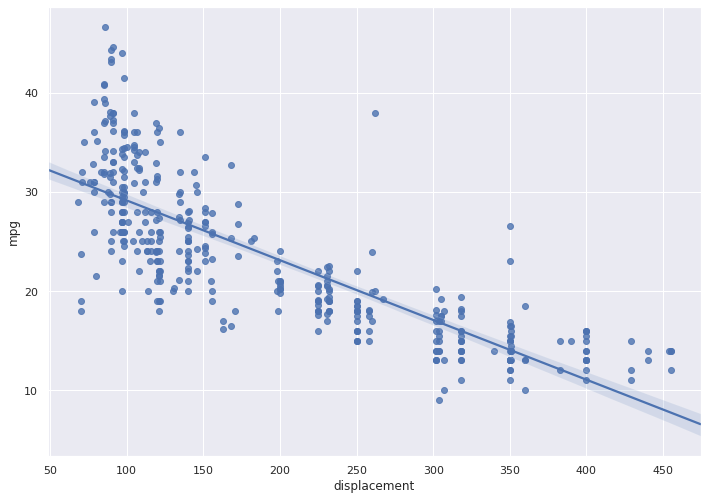

In [21]:
sns.regplot(x="displacement", y="mpg", data=df)

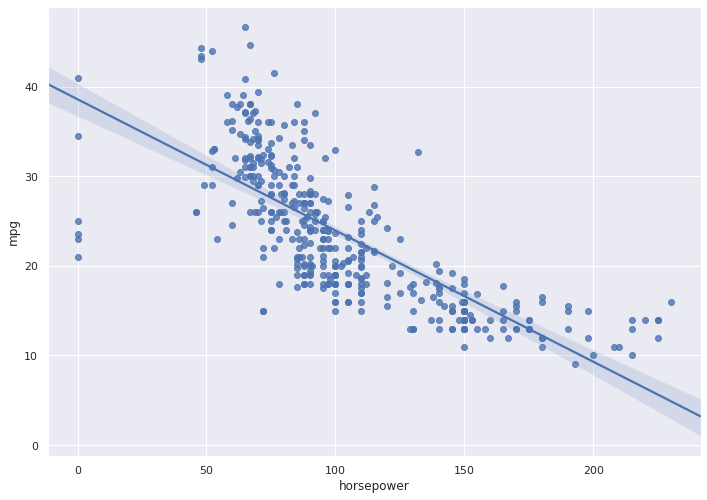

In [22]:
sns.regplot(x="horsepower", y="mpg", data=df)

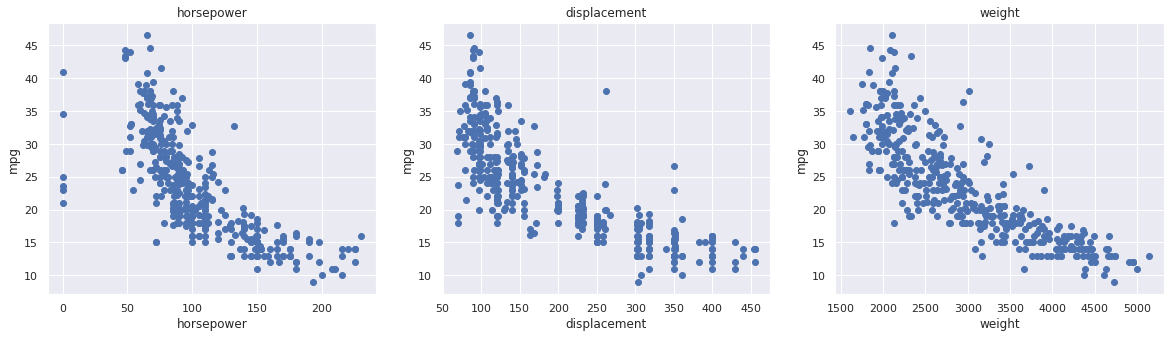

In [23]:
#ploting at the same time methods
plt.figure(figsize=(20, 5))

features = ['horsepower', 'displacement','weight']
target = df['mpg']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('mpg')

In [22]:
#sklearn methods for data frame spliting to train and test df. 

In [35]:
yl = df.mpg
Xl = df[['horsepower','displacement','weight']]

In [36]:
Xl_train, Xl_test, yl_train, yl_test = sklearn.model_selection.train_test_split(Xl, yl, test_size=0.2)
Xl_train.reset_index(drop = True) # reset_index only for reindexing because of some probleme on the 1st indexing
Xl_test.reset_index(drop = True)  # reset_index only for reindexing because of some probleme on the 1st indexing

,horsepower,displacement,weight
0,140.0,302.0,3449.0
1,75.0,108.0,2265.0
2,95.0,115.0,2694.0
3,110.0,231.0,3039.0
4,0.0,140.0,2905.0
...,...,...,...
75,77.0,183.0,3530.0
76,130.0,307.0,3504.0
77,86.0,107.0,2464.0
78,62.0,89.0,1845.0


In [37]:
#Numpy methods to data splitting 
target_features = df[['horsepower', 'displacement','weight','mpg']]

msk = np.random.rand(len(df)) < 0.8
train = target_features[msk] #80% portion of df
test = target_features[~msk] #20% (the rest)

train_x= np.asanyarray(train[['horsepower', 'displacement','weight']])
train_y= np.asanyarray(train[['mpg']])

In [38]:
#we need to fit the variables on a lineare regression model so we creat a LinearRegression object
regr=linear_model.LinearRegression()

In [39]:
regr.fit(Xl_train,yl_train) #regr.fit(train_x,train_y)
regr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
expected=yl_test
predicted=regr.predict(Xl_test) # predicted=regr.predict(test_x)
predicted , np.array(expected)

(array([18.79011695, 28.83422849, 25.78678921, 22.58443922, 28.17363862,
        29.69014198, 30.50035215, 26.72559795, 30.61937119, 25.74195063,
        27.5103254 , 23.84816006, 22.45551532, 28.21944699, 26.57912   ,
        26.18880023, 27.89801759, 27.16672347, 21.00755099, 29.15278354,
        22.8588133 , 24.5678761 , 26.81132273, 25.50795161, 11.86069697,
        15.77165012, 31.09020979, 21.97098029, 27.2229184 , 31.66570677,
        29.84437381, 28.01406243, 31.38940126, 23.45048301, 12.84595109,
        18.9827164 , 29.77977618, 27.18070005, 26.44634211, 29.12683632,
        24.65582048, 29.03742425, 27.28397231, 11.61257784, 26.79162393,
        30.18216171, 29.1307296 , 23.80221479, 31.41839027, 25.11276774,
        12.54289393, 24.39222112, 22.03808139, 30.04482523, 25.3419632 ,
        31.44022353, 26.54001207, 29.33199177, 20.68421665, 27.47216704,
        16.70170809, 25.52177764, 20.63320822, 30.8584697 , 15.74166093,
         6.61963791, 20.26149081, 23.60996816, 18.4

In [41]:
mse = np.mean((predicted-expected)**2)#residual sum of squares
print ("const",regr.intercept_,"var std" ,regr.coef_, "mean_squared_error",mse )
print("R^2",regr.score(Xl_test, yl_test))

#R^2=0.71 seems to be good
#mse seems to be good

const 44.25535069356113 var std [-0.03854244 -0.00718841 -0.00518944] mean_squared_error 25.128646148477934
R^2 0.5894347077116082


In [42]:
#our equations y_hat= 44.75 - 0.03184319 * x_horsepower - 0.00891365 * x_displacement - 0.00542752 * x_weight

Text(0.5, 1.0, 'model year')

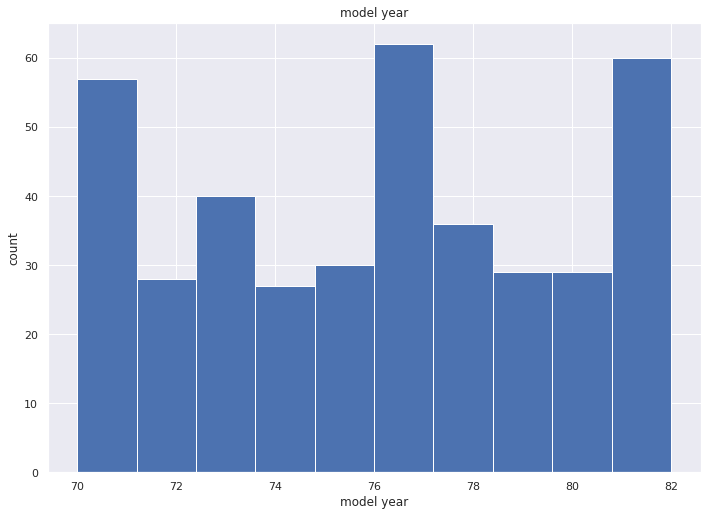

In [43]:
plt.hist(df["model year"])
plt.xlabel("model year")
plt.ylabel("count")
plt.title("model year")


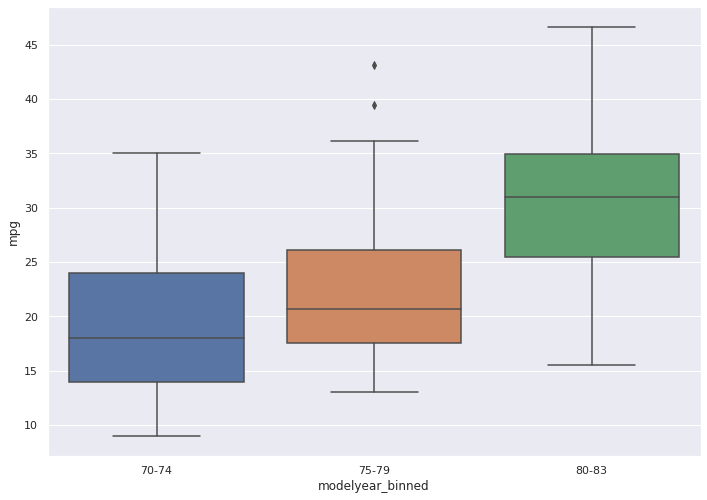

In [44]:
bins = np.linspace(min(df["model year"]), max(df["model year"]), 4)
group_names=['70-74','75-79','80-83']
df['modelyear_binned'] = pd.cut(df['model year'], bins, labels=group_names, include_lowest=True )
sns.boxplot(x="modelyear_binned", y="mpg", data=df)

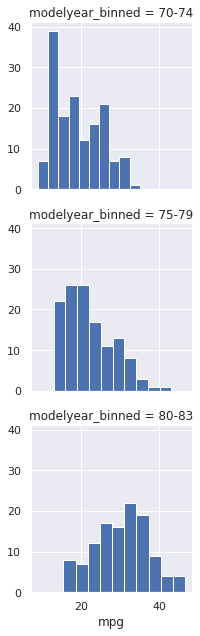

In [45]:
g = sns.FacetGrid(df, row = "modelyear_binned")
g = g.map(plt.hist, "mpg")
plt.show()

In [46]:
df[['model year','modelyear_binned']].head(20)


,model year,modelyear_binned
0,70,70-74
1,70,70-74
2,70,70-74
3,70,70-74
4,70,70-74
5,70,70-74
6,70,70-74
7,70,70-74
8,70,70-74
9,70,70-74


In [53]:
c=df["modelyear_binned"].value_counts()
c

70-74    152
75-79    128
80-83    118
Name: modelyear_binned, dtype: int64

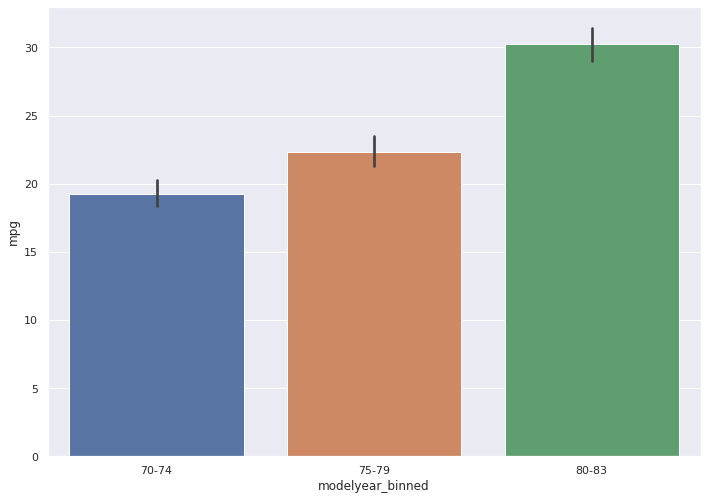

In [55]:
sns.barplot(x="modelyear_binned", y="mpg", data=df)

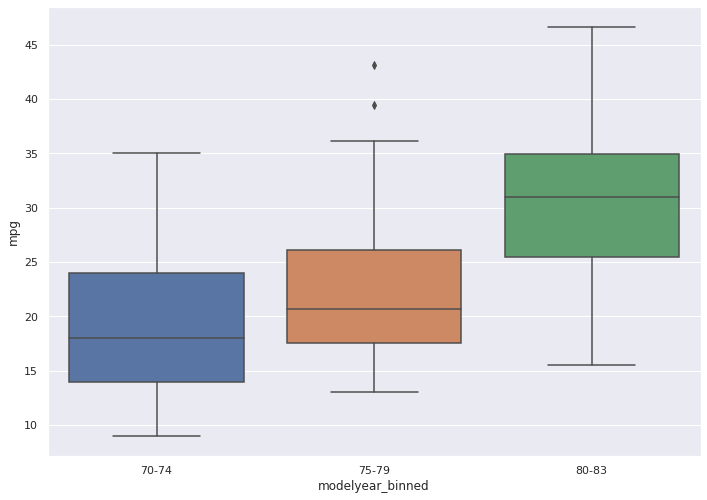

In [101]:
sns.boxplot(x="modelyear_binned", y="mpg", data=df)

In [56]:
df_group_one = df[['modelyear_binned','mpg']]


In [57]:
#let see mean of each model year (2methods)
df_group_one = df_group_one.groupby(['modelyear_binned'],as_index=False).mean()
df_group_one

,modelyear_binned,mpg
0,70-74,19.269737
1,75-79,22.360937
2,80-83,30.233898


In [58]:
classic = df.loc[df.modelyear_binned=="70-74", "mpg"]
out_of_fashion = df.loc[df.modelyear_binned=="75-79", "mpg"]
new = df.loc[df.modelyear_binned=="80-83","mpg"]
{"classical cars mpg avg":classic.mean() ,"outoffashion cars mpg avg":out_of_fashion.mean() ,"new mpg avg":new.mean() }

{'classical cars mpg avg': 19.269736842105264,
 'outoffashion cars mpg avg': 22.3609375,
 'new mpg avg': 30.23389830508475}

In [59]:
df['model year'].mean()

76.01005025125629

In [60]:
#we can see that the 80-83 fashion have 30.23 in average the mpg average, we want to verifiy the next hypothesis h0:'out 80-83 consumes more galons per mile'

In [64]:
#ANOVA test
f,p=stats.f_oneway( out_of_fashion, classic,new)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis


In [66]:
y = df.mpg
X = df[['horsepower','displacement','weight']]

In [67]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,test_size=0.2)

In [68]:
X_train.head()

,horsepower,displacement,weight
172,71.0,90.0,2223.0
192,105.0,250.0,3353.0
288,135.0,318.0,3830.0
282,88.0,140.0,2890.0
189,120.0,304.0,3962.0


In [38]:
clf=tree.DecisionTreeRegressor()
clf.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [39]:
confidence = clf.score(X_test,y_test)
print("\nThe confidence score:\n")
print(confidence)


The confidence score:

0.6596147405704458


In [44]:
#let's predict new value of mpg 
predicted0 = clf.predict(X_test)
predicted0 , np.array(y_test)

(array([25. , 15.5, 25. , 31.3, 28. , 13. , 17. , 17.7, 23. , 36. , 24. ,
        21.5, 14. , 29.5, 17.7, 12. , 37.2, 23. , 12. , 13. , 35.7, 37.2,
        32.3, 34.4, 16. , 19. , 25. , 24.5, 18. , 39.1, 26. , 29. , 19. ,
        12. , 18. , 24. , 14. , 32.4, 32. , 17. , 18. , 14. , 13. , 19.4,
        19. , 25. , 10. , 19. , 13. , 37. , 37.2, 26. , 36. , 39.1, 19. ,
        34.1, 22. , 24. , 37.2, 17.5, 34.4, 36. , 32. , 19. , 25.5, 19.4,
        24. , 18.1, 15. , 24. , 18.5, 27. , 28. , 17. , 39.4, 27.9, 32. ,
        13. , 16. , 17. ]),
 array([30.9, 15. , 22. , 31.6, 34. , 17.6, 15. , 19.2, 22. , 32.1, 21. ,
        21. , 15.5, 30. , 16. , 12. , 29. , 16.5, 13. , 14. , 33.5, 46.6,
        33.8, 36.1, 20.5, 20. , 20. , 44. , 29. , 31. , 32.2, 44.6, 18. ,
        11. , 20. , 25. , 17.5, 32.4, 19. , 22. , 15. , 12. , 18.5, 13. ,
        16. , 27. , 13. , 22. ,  9. , 34.1, 31.8, 33.5, 30. , 36. , 19. ,
        38. , 26. , 25. , 40.8, 14. , 30.5, 33.7, 32.8, 23. , 25.1, 15. ,
        37

In [41]:
expected0 = y_test

In [154]:
mse = np.mean((predicted0-expected0)**2)
print ("mse",mse)
print("R^2",clf.score(Xl_test, yl_test))

mse 30.852875
R^2 0.7551018406679648
